### <div align="center">Neural Networks in PyTorch</div>

#### 6.1: Employee Bonus Prediction
- nn.Module is a base class for all neural network modules.
- A usual practice is to create a subclass out of nn.Module to define your own neural network architecture.
- Calling model(train_data) will internally call the forward method on your subclass.

In [6]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# Load data from CSV file
df = pd.read_csv("../../data/bonus_dataset.csv")
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


##### Train Test Split

In [5]:
# Separate features and target
X = df[['performance', 'years_of_experience', 'projects_completed']].values
y = df[['bonus']].values  # Ensure target is a 2D array for compatibility

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Train a Neural Network

In [7]:
# Seed for reproducibility
torch.manual_seed(0)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [8]:
class BonusPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(3, 1),  # 3 input features -> 1 output neuron
        )

    def forward(self, x):
        return self.network(x)

In [9]:
model = BonusPredictor()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [10]:
# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass: Compute predicted bonus by passing X_train
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass: Compute gradients
    optimizer.zero_grad()
    loss.backward()

    # Update parameters
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.2f}")

Epoch [100/5000], Loss: 19.62
Epoch [200/5000], Loss: 17.46
Epoch [300/5000], Loss: 15.56
Epoch [400/5000], Loss: 13.88
Epoch [500/5000], Loss: 12.38
Epoch [600/5000], Loss: 11.05
Epoch [700/5000], Loss: 9.86
Epoch [800/5000], Loss: 8.80
Epoch [900/5000], Loss: 7.85
Epoch [1000/5000], Loss: 7.01
Epoch [1100/5000], Loss: 6.25
Epoch [1200/5000], Loss: 5.58
Epoch [1300/5000], Loss: 4.98
Epoch [1400/5000], Loss: 4.44
Epoch [1500/5000], Loss: 3.96
Epoch [1600/5000], Loss: 3.54
Epoch [1700/5000], Loss: 3.16
Epoch [1800/5000], Loss: 2.82
Epoch [1900/5000], Loss: 2.51
Epoch [2000/5000], Loss: 2.24
Epoch [2100/5000], Loss: 2.00
Epoch [2200/5000], Loss: 1.79
Epoch [2300/5000], Loss: 1.59
Epoch [2400/5000], Loss: 1.42
Epoch [2500/5000], Loss: 1.27
Epoch [2600/5000], Loss: 1.13
Epoch [2700/5000], Loss: 1.01
Epoch [2800/5000], Loss: 0.90
Epoch [2900/5000], Loss: 0.81
Epoch [3000/5000], Loss: 0.72
Epoch [3100/5000], Loss: 0.64
Epoch [3200/5000], Loss: 0.57
Epoch [3300/5000], Loss: 0.51
Epoch [3400/5

In [11]:
# Switch to evaluation mode (important for models with dropout/batch norm layers)
model.eval()

# Disable gradient calculations for evaluation to save memory
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)

print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0725


In [12]:
X_test_tensor[:3]

tensor([[10.,  4.,  7.],
        [ 3.,  5.,  8.],
        [ 8.,  7., 10.]])

In [13]:
test_predictions[:3]

tensor([[178.3009],
        [102.0224],
        [178.3721]])

In [14]:
y_test_tensor[:3]

tensor([[178.],
        [102.],
        [178.]])

In [15]:
for name, value in model.named_parameters():
    print(f"Name: {name}, Value: {value}")

Name: network.0.weight, Value: Parameter containing:
tensor([[12.0477,  5.8225,  2.2331]], requires_grad=True)
Name: network.0.bias, Value: Parameter containing:
tensor([18.9024], requires_grad=True)


#### 6.2: Datasets and Data Loaders
- PyTorch provides a number of pre-loaded datasets that cover images, text, and audio.
- DataLoader lets you create batches from a large dataset easily for training. It also allows reshuffling the data at every epoch to reduce model overfitting.

In [29]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

#### 1. Datasets

In [17]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:10<00:00, 2.58MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 207kB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 2.34MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]


In [18]:
len(training_data)

60000

In [19]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [20]:
len(test_data)

10000

In [21]:
image, label = training_data[0]

In [22]:
image.shape

torch.Size([1, 28, 28])

In [23]:
label

9

In [24]:
image.squeeze().shape

torch.Size([28, 28])

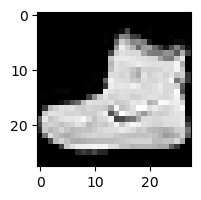

In [25]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")

In [26]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

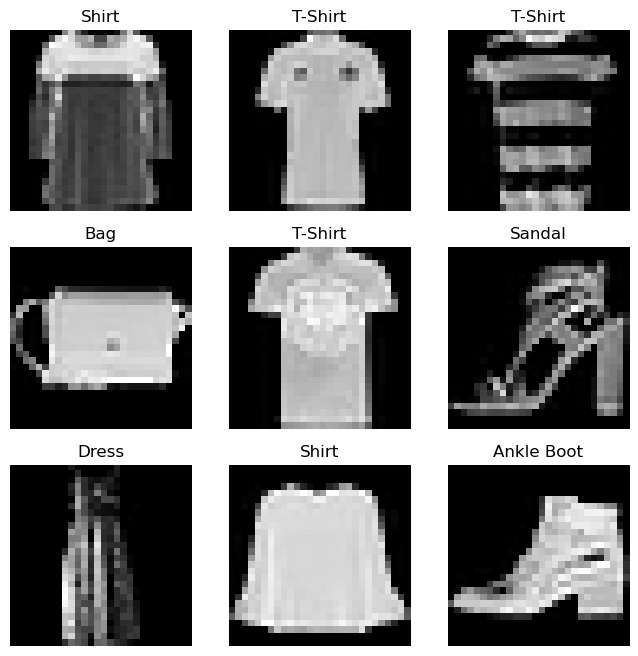

In [27]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### 2. DataLoaders

In [30]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [31]:
for images, labels in train_dataloader:
    print(images.size())
    break

torch.Size([64, 1, 28, 28])


In [32]:
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

In [33]:
images.size()

torch.Size([64, 1, 28, 28])

In [35]:
img = images[2].squeeze()
label = labels[2]

In [36]:
label.item()

1

In [37]:
labels_map[label.item()]

'Trouser'

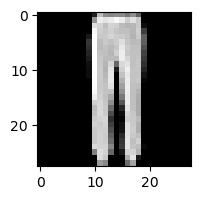

In [38]:
plt.figure(figsize=(2,2))
plt.imshow(img, cmap="gray")
plt.show()

#### 6.3: Handwritten Digits Classification

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [40]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='../../data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='../../data', train=False, transform=transform, download=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:09<00:00, 1.04MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 128kB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.18MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.63MB/s]


In [41]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [42]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [43]:
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [44]:
images[0].shape

torch.Size([1, 28, 28])

In [45]:
images[0].squeeze().shape

torch.Size([28, 28])

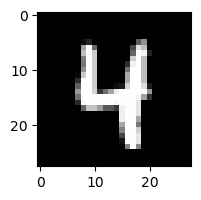

In [46]:
plt.figure(figsize=(2,2))
plt.imshow(images[4].squeeze(), cmap="gray")
plt.show()

In [47]:
labels[4]

tensor(4)

#### Train a Fully Connected Neural Network (FCNN)

In [48]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.network(x)

In [49]:
# Instantiate the model, define loss function and optimizer
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()          # Zero the gradients
        outputs = model(images)        # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward()                # Backpropagate
        optimizer.step()               # Update weights

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/5], Loss: 0.3910
Epoch [2/5], Loss: 0.1845
Epoch [3/5], Loss: 0.1333
Epoch [4/5], Loss: 0.1106
Epoch [5/5], Loss: 0.0927


In [50]:
# Testing the model
model.eval()  # Switch to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 96.99%


#### Classification Report & Confusion Matrix

In [51]:
# Testing the model
model.eval()  # Switch to evaluation mode

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append labels and predictions to lists
        all_labels.extend(labels.numpy())    
        all_predicted.extend(predicted.numpy()) 

In [52]:
len(all_predicted)

10000

In [53]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels, all_predicted)
cm

array([[ 971,    0,    1,    0,    0,    1,    2,    2,    2,    1],
       [   0, 1124,    2,    2,    0,    1,    2,    3,    1,    0],
       [   4,    0, 1004,    0,    3,    0,    4,   12,    5,    0],
       [   0,    1,    5,  982,    0,    7,    0,    7,    3,    5],
       [   1,    0,    7,    0,  949,    0,    2,    6,    0,   17],
       [   6,    0,    0,    8,    2,  864,    3,    1,    4,    4],
       [   8,    3,    4,    1,    8,    5,  926,    1,    2,    0],
       [   1,    4,    7,    4,    1,    1,    0, 1000,    0,   10],
       [   2,    2,    5,   18,    9,    7,    7,    7,  915,    2],
       [   6,    3,    0,    8,   14,    4,    0,    9,    1,  964]],
      dtype=int64)

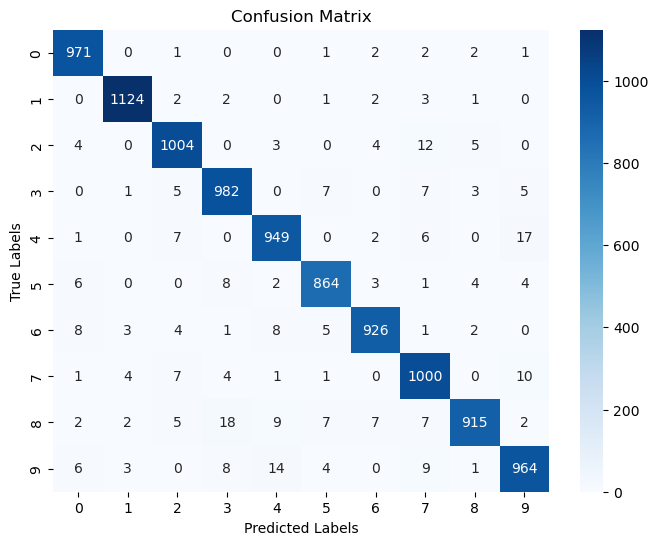

In [55]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 6.5: Cost Function - Binary Cross Entropy (a.k.a Log Loss)

##### Reasons for Using Binary Cross Entropy
- Aligns perfectly with probabilistic outputs, providing a natural fit for binary outcomes.
- Produces convex cost function (when used with sigmoid) which is good for global minimum convergence.
- Provides strong gradient updates, especially for confident, incorrect predictions.
- Incorrect predictions are penalized logarithmically, encouraging accuracy and discouraging overconfidence in errors.
- Cost functions like MSE may not work well for binary classification problems as the cost surface will not be convex and you may get stuck in local minima.
- Binary Cross Entropy (BCE) along with sigmoid activation gives a smooth, convex surface for the cost function which makes convergence easier
- BCE also penalizes high confidence errors, which eventually helps in efficient discovery of global minimum
- BCE aligns perfectly with probabilistic outputs, providing a natural fit for binary outcomes

In [56]:
import torch
import torch.nn as nn

In [57]:
criterion = nn.MSELoss()

y_pred = torch.tensor([0.9])
y_true = torch.tensor([0], dtype=torch.float)

loss = criterion(y_pred, y_true)
print(f"MSE Loss: {loss.item(): 0.2f}")

MSE Loss:  0.81


In [58]:
criterion = nn.BCELoss() # Binary Cross Entropy Loss

y_pred = torch.tensor([0.1])
y_true = torch.tensor([0], dtype=torch.float)

loss = criterion(y_pred, y_true)
print(f"Binary Cross Entropy Loss: {loss.item(): 0.2f}")

Binary Cross Entropy Loss:  0.11


In [59]:
criterion = nn.BCELoss() # Binary Cross Entropy Loss

y_pred = torch.tensor([0.8, 0.2, 0.8, 0.9])
y_true = torch.tensor([1, 0, 0, 1], dtype=torch.float)

loss = criterion(y_pred, y_true)
print(f"Binary Cross Entropy Loss: {loss.item(): 0.2f}")

Binary Cross Entropy Loss:  0.54


#### 6.6: Cost Function: Cross Entropy

In [60]:
loss_func = nn.CrossEntropyLoss()

y_pred = torch.tensor([[0.1, 0.2, 0.7]]) # dog (0), cat (1), koala (2)
y_true = torch.tensor([2])

loss = loss_func(y_pred, y_true)
print(f"Cross Entropy Loss: {loss.item(): 0.2f}")

Cross Entropy Loss:  0.77


In [61]:
loss_func = nn.CrossEntropyLoss()

y_pred = torch.tensor([[0.7, 0.2, 0.1]])
y_true = torch.tensor([2])

loss = loss_func(y_pred, y_true)
print(f"Cross Entropy Loss: {loss.item(): 0.2f}")

Cross Entropy Loss:  1.37


- Categorical Cross Entropy (a.k.a just Cross Entropy) is used for multi-class classification problems
- Binary Cross Entropy is a special case of Categorical Cross Entropy when output classes are binary

#### MCQ:
- What is nn.Module in PyTorch?
  - A base class for all neural network modules
- What does calling model(train_data) function do in PyTorch?
  - It internally calls the forward method on your subclass
- What does subclassing nn.Module allow you to do?
  - Define your own neural network architecture
- Why is Binary Cross Entropy used in binary classification problems?
  - It gives a smooth, convex surface for the cost function
- What is the purpose of using DataLoader in PyTorch?
  - To create batches from the dataset for training
- What advantage does Binary Cross Entropy have over MSE in binary classification?
  - It penalizes high confidence errors, aiding in global minimum discovery